# Plant-Health-Data
Real-Time Plant Health Insights: Simulated Biosensor Data for AI-Driven Monitor

Key Features:  
Timestamp: The date and time of each biosensor reading.  
Plant_ID: Unique identifier for each plant in the dataset.  
Soil_Moisture (%): Measures the water content in soil, crucial for maintaining adequate hydration levels.  
Ambient_Temperature (°C): Ambient temperature around the plant.  
Soil_Temperature (°C): Soil temperature near plant roots.  
Humidity (%): Air humidity level, which affects plant transpiration and growth.  
Light_Intensity (Lux): Measures light exposure, essential for photosynthesis.  
Soil_pH: Indicates the acidity or alkalinity of the soil, affecting nutrient availability.  
Nitrogen_Level (mg/kg): Key nutrient supporting plant growth and leaf development.  
Phosphorus_Level (mg/kg): Nutrient important for root and flower development.  
Potassium_Level (mg/kg): Nutrient aiding in overall plant resilience and disease resistance.  
Chlorophyll_Content (mg/m²): Chlorophyll concentration reflects photosynthetic activity and plant health.  
Electrochemical_Signal (mV): Represents stress signals detected in plants, often due to environmental changes or internal stress responses.  

Plant_Health_Status: Categorical label indicating the overall health of the plant, based on soil moisture and nutrient levels. It has three possible values:  
Healthy  
Moderate Stress  
High Stress  

#### Aim:
To build a model to predict plant health and wrap it in streamlit with REST API to give realtime prediction

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score
import pickle

In [76]:
data = pd.read_csv("plant_health_data.csv")

In [68]:
data.columns

Index(['Timestamp', 'Plant_ID', 'Soil_Moisture', 'Ambient_Temperature',
       'Soil_Temperature', 'Humidity', 'Light_Intensity', 'Soil_pH',
       'Nitrogen_Level', 'Phosphorus_Level', 'Potassium_Level',
       'Chlorophyll_Content', 'Electrochemical_Signal', 'Plant_Health_Status'],
      dtype='object')

In [69]:
data.drop(["Timestamp","Plant_ID"],axis=1,inplace=True)

In [74]:
label_encoder = LabelEncoder()
data["Plant_Health_Status"] = label_encoder.fit_transform(data["Plant_Health_Status"])

0 : Healthy  
1 : High Stress  
2 : Moderate Stress  

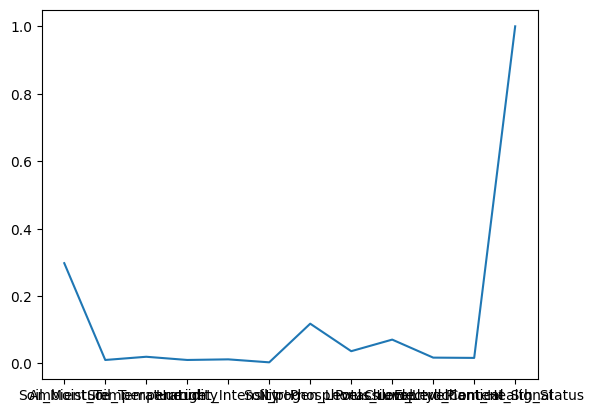

In [61]:
plt.plot(abs(data.corr()["Plant_Health_Status"]))

In [73]:
y.value_counts()

1    500
2    401
0    299
Name: Plant_Health_Status, dtype: int64

In [62]:
X = data2[['Soil_Moisture','Nitrogen_Level']] #features correlated with Plant_Health_Status
y = data['Plant_Health_Status']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
xgb = XGBClassifier(n_estimators=100,enable_categorical=True)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Precision:", precision_score(y_test, preds, average='micro'))
print("Recall:",recall_score(y_test, preds, average='micro'))
print("F1-Score:", f1_score(y_test, preds, average='micro'))
print(confusion_matrix(y_test, preds))

XGBoost's prediction accuracy is: 99.72
Precision: 0.9972222222222222
Recall: 0.9972222222222222
F1-Score: 0.9972222222222222
[[ 92   0   0]
 [  0 144   0]
 [  0   1 123]]


Model performed good by only using Soil_Moisture and Nitrogen_Level

#### Saving the model for predictions

In [64]:
with open("Plant_health_model.pkl", "wb") as f:
    pickle.dump(xgb, f)